In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring challenge data

In [3]:
df = pd.read_csv("../data/Challenge_Data/performance_data.csv")

In [20]:
df.columns

Index(['game_id', 'preview_link', 'ER', 'CTR'], dtype='object')

#### In mobile advertising, two key metrics often analyzed are:ER and CTR

 Engagement Rate (ER):

- Definition: While "ER" with a commonly used definition in mobile advertising refers to Estimated Revenue (ER). This metric represents the projected average revenue earned from each user who installs the app through the ad campaign.

 Click-Through Rate (CTR):

- Definition: CTR measures the percentage of people who see yan ad and then click on it. It's calculated by dividing the number of clicks an ad receives by the number of times it's shown (impressions). CTR = (Clicks / Impressions) * 100%

CTR: Measures ad engagement and how well it attracts clicks.
ER: Measures user value and the expected revenue generated from those clicks.


In [29]:
df.shape

(905, 4)

In [4]:

df.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [8]:
df.info()  # Get information about the dataframe, such as data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


In [6]:
df.describe() # Summary statistics for numerical columns

,ER,CTR
count,905.000000,905.000000
mean,0.136318,0.034466
std,0.091524,0.036967
min,0.000000,0.000000
25%,0.070338,0.007926
50%,0.118624,0.024537
75%,0.190722,0.047796
max,0.524498,0.297410


In [33]:
print(f"The maximum Engagement Rate is {df['ER'].max()}")
print(f"The minimum Engagement Rate is {df['ER'].min()}")
print(f"The maximum Click Through Rate is {df['CTR'].max()}")
print(f"The maximum Click Through Rate is {df['CTR'].min()}")

The maximum Engagement Rate is 0.5244978411864089
The minimum Engagement Rate is 0.0
The maximum Click Through Rate is 0.2974101921470342
The maximum Click Through Rate is 0.0


In [34]:
max_index = df['ER'].idxmax()
max_row = df.loc[max_index]
max_row

game_id                          0792c911c288bd241c1e2a2b64bce488
preview_link    https://s3.eu-west-1.amazonaws.com/a.futureadl...
ER                                                       0.524498
CTR                                                      0.025249
Name: 357, dtype: object

In [35]:
min_index = df['ER'].idxmin()
min_row = df.loc[min_index]
min_row

game_id         adunit-western-union-sensory-unit-swipe-right-...
preview_link    https://s3.us-west-1.amazonaws.com/a.futureadl...
ER                                                            0.0
CTR                                                           0.0
Name: 9, dtype: object

In [37]:
max_index = df['CTR'].idxmax()
max_row = df.loc[max_index]
max_row

game_id                          6befe54086758294b47addf0c12052a7
preview_link    https://s3.ap-east-1.amazonaws.com/a.futureadl...
ER                                                       0.327068
CTR                                                       0.29741
Name: 161, dtype: object

In [38]:
min_index = df['CTR'].idxmin()
min_row = df.loc[min_index]
min_row

game_id         adunit-western-union-sensory-unit-swipe-right-...
preview_link    https://s3.us-west-1.amazonaws.com/a.futureadl...
ER                                                            0.0
CTR                                                           0.0
Name: 9, dtype: object

In [11]:
df.isnull().sum()

game_id         0
preview_link    0
ER              0
CTR             0
dtype: int64

In [48]:
count = df[df['ER'] >= 0.1].shape[0]
print(f"{count} amount of Ads has generated atleast 0.1% ER")

539 amount of Ads has generated atleast 0.1% ER


In [49]:
counts = df[df['CTR'] >= 0.1].shape[0]
print(f"{counts} amount of Ads has generated atleast 0.1% CTR")

44 amount of Ads has generated atleast 0.1% CTR


### Distribution of ER and CTR

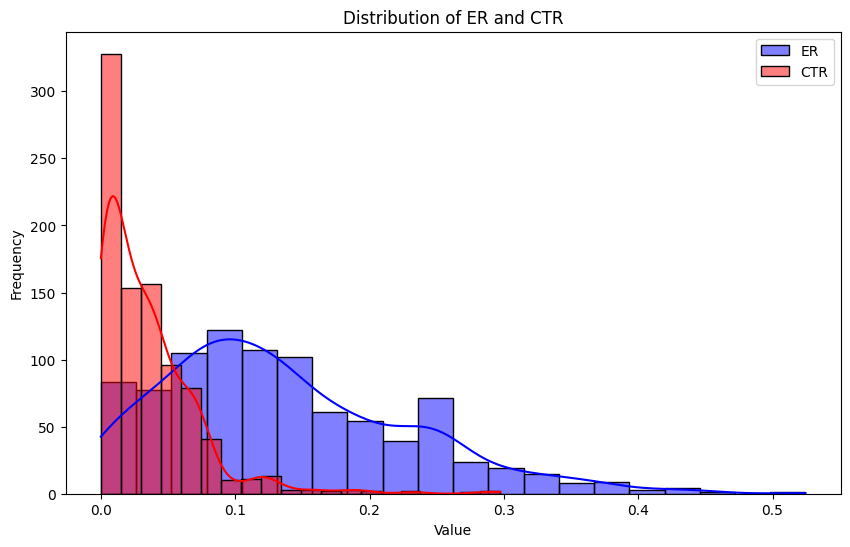

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ER'], bins=20, kde=True, color='blue', label='ER')
sns.histplot(df['CTR'], bins=20, kde=True, color='red', label='CTR')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of ER and CTR')
plt.legend()
plt.show()

### Looking at the relationship between ER and CTR

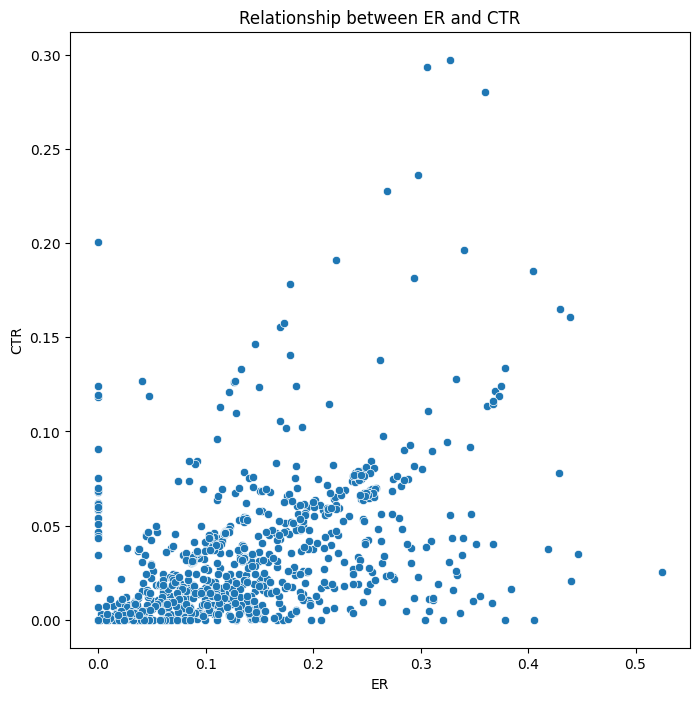

In [13]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='ER', y='CTR', data=df)
plt.xlabel('ER')
plt.ylabel('CTR')
plt.title('Relationship between ER and CTR')
plt.show()

### Correlation

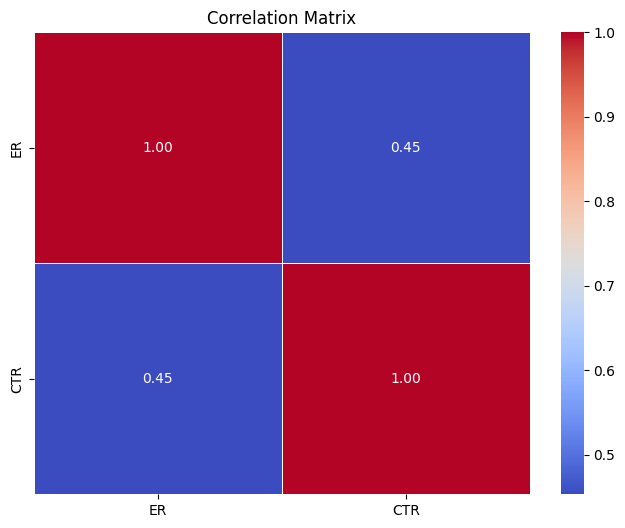

In [14]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Exploring concepts assets and frames

#### Load concepts data

In [16]:
df2 = pd.read_json("../data/concepts.json")

In [24]:
df2.columns

Index(['concept', 'implementation', 'explanation', 'asset_suggestions'], dtype='object')

In [28]:
df2.shape

(115, 4)

In [23]:
df2.head()

,concept,implementation,explanation,asset_suggestions
0,Escape Challenge Teaser,{'frame_1': {'description': 'The ad begins wit...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
1,Interactive Storytelling,{'frame_1': {'description': 'The ad opens with...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
2,City Tour,{'frame_1': {'description': 'The ad begins wit...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
3,Interactive Globe Journey,{'frame_1': {'description': 'The ad opens with...,This concept aligns with the brand's identity ...,[{'frame_1': {'3D Globe': 'A high-definition 3...
4,Cultural Carousel,{'frame_1': {'description': 'A carousel of cul...,This concept leverages the brand's diverse por...,[{'frame_1': {'Background Image': 'A high-reso...


In [18]:
df2.describe()

,concept,implementation,explanation,asset_suggestions
count,115,115,115,115
unique,99,111,103,103
top,The ad begins with a captivating image of the ...,{'frame_1': {'description': 'The ad opens with...,This concept aligns with Adludio's brand ident...,[{'frame_1': {'Background Animation': 'A suspe...
freq,5,5,5,13


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   concept            115 non-null    object
 1   implementation     115 non-null    object
 2   explanation        115 non-null    object
 3   asset_suggestions  115 non-null    object
dtypes: object(4)
memory usage: 3.7+ KB


In [21]:
df2.columns

Index(['concept', 'implementation', 'explanation', 'asset_suggestions'], dtype='object')

#### Extracting all the interaction types of the implementation

In [26]:
# Extract all implementation types
implementation_types = set()

for index, row in df2.iterrows():
    implementation = row['implementation']
    # print(list(implementation.items()))
    # break
    for frame, details in list(implementation.items()):
        # print(details)
        if "interaction_type" in details and details['interaction_type']:
            implementation_types.add(details['interaction_type'])
        # else:
            # print(details)

print("All interaction types:", implementation_types)

All interaction types: {'Drag and Drop', 'Tap', 'None', 'Tap and Hold', 'Swipe', 'Choice Selection'}


In [27]:
len(implementation_types)

6

#### Extract asset category types

In [30]:
from collections import defaultdict


asset_categories = defaultdict(int)
for suggestions in df2['asset_suggestions']:
    for frames in suggestions:
        for frame in frames:
            if frame != "explanation":
                for key in frames[frame].keys():
                    asset_categories[key] += 1


asset_categories = sorted(asset_categories.items(), reverse=True, key=lambda x:x[1])
print(asset_categories)

[('Background', 530), ('Interactive Element', 340), ('Logo', 287), ('Product Image', 251), ('CTA', 231), ('Text', 184), ('Headline Text', 159), ('Background Image', 146), ('Brand Logo', 117), ('Text Overlay', 77), ('Foreground', 71), ('Animation', 61), ('CTA Button', 54), ('Interaction', 39), ('Engagement Text', 37), ('Engagement Visual', 33), ('Product Close-up', 28), ('Tagline', 26), ('Swipe Indicator', 25), ('CTA Text', 24), ('Interactive Elements', 24), ('Overlay Text', 21), ('Interactive Text', 18), ('Product Feature Highlight', 17), ('Background Animation', 16), ('Main Character', 16), ('Voiceover', 15), ('Product', 15), ('Main Visual', 15), ('Main Product', 15), ('Countdown Timer', 13), ('Video Clips', 13), ('Toolbox', 13), ('Sound Effects', 13), ('Ending Scene', 13), ('Animated Cat', 13), ('Product Highlight', 12), ('Special Offer', 12), ('Adludio Logo', 12), ('Interactive Prompt', 12), ('Image Gallery', 12), ('Main Focus', 12), ('Interactive Button', 11), ('Product Video', 10)

In [31]:
len(asset_categories)

241

#### Top 10 categories of asset visualization

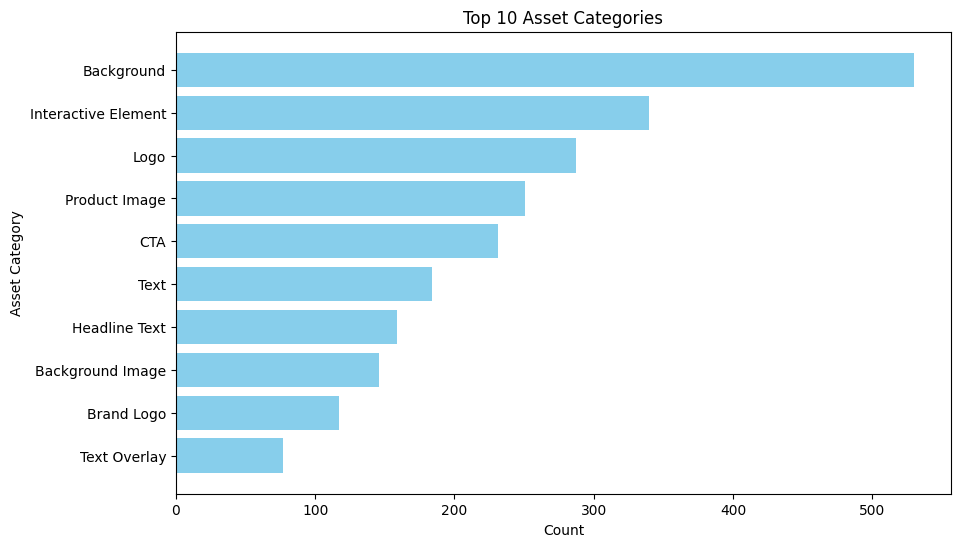

In [32]:
# Extract top 10 categories
top_10_categories = asset_categories[:10]

# Extract category names and counts for plotting
categories = [category[0] for category in top_10_categories]
counts = [category[1] for category in top_10_categories]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Asset Category')
plt.title('Top 10 Asset Categories')
plt.gca().invert_yaxis()  # Invert y-axis to display the category with highest count on top
plt.show()